Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC3641 - Aprendizaje Automático Basado en Grafos <br>
Segundo Semestre 2025<br>


<h1><center> Tarea 1: Modelos de grafos  </center></h1>
        Profesor: Marcelo Mendoza<br>
        Fecha de entrega: 8 de septiembre

---

## Indicaciones

Se debe entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se asignará puntaje por el código implementado y los comentarios asociados a resultados.
- El notebook debe tener todas las celdas de código ejecutadas.
- Cualquier instancia de copia resultará en un 1,1 como nota de curso.
- Esta tarea **NO** requiere el uso de GPU.

---

# Integrantes del grupo

* Estudiante 1: Itzae Flores
* Estudiante 2: Matías Vidal

# Librerías

In [4]:
pip install networkx


     ---------------------------------------- 1.7/1.7 MB 1.7 MB/s eta 0:00:00


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx

# Importa aquí las librerías que vayas a utilizar

# Parte 1: Análisis red de colaboración (20 puntos)

En esta sección se debe desarrollar un análisis descriptivo con las principales características asociadas a las siguietes redes:
* **General Relativity and Quantum Cosmology collaboration network:** ca-GrQc.txt
* **Erdös Number:** Erdos982.txt

Suponga que las redes son no dirigidas.

In [10]:
df_asia = pd.read_csv("lastfm_asia_edges.csv")

df_asia.head()


,node_1,node_2
0,0,747
1,1,4257
2,1,2194
3,1,580
4,1,6478


## 1.1 Medidas básicas (10 puntos)


Grafique las redes de colaboraciones y determine las siguientes medidas descriptivas para cada caso si se puede:

* Número de nodos
* Número de componentes
* Número de aristas
* Grado promedio
* Diametro
* Camino mínimo promedio

¿Qué características diferencian a estas redes? Interprete sus resultados en el contexto del problema.

**Observación**

En caso de reconocer dos o más componentes asociados a una red, solo trabaje con la de mayor tamaño .


**Respuesta:**

ca-algo

In [13]:
fh = open("ca-GrQc.txt", "rb")
G = nx.read_edgelist(fh)
fh.close()


#cantidad de nodos y edges
print(G)

#cantidad de componentes

num_components = nx.number_connected_components(G)
print("Número de componentes conexas:", num_components)


Graph with 5244 nodes and 14497 edges
Número de componentes conexas: 356


C:\Users\itzae\AppData\Local\Temp\ipykernel_9204\2622101112.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label="Grado del Nodo")


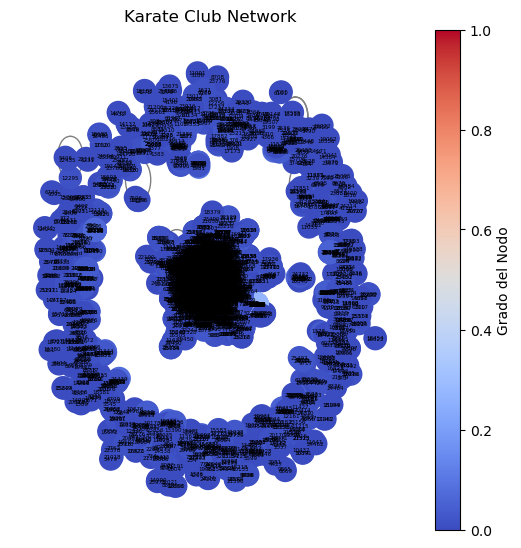

In [21]:
node_degrees = dict(G.degree())
degrees = np.array(list(node_degrees.values()))
min_degree = degrees.min()
max_degree = degrees.max()

normalized_degrees = (degrees - min_degree) / (max_degree - min_degree)

colors = plt.cm.coolwarm(normalized_degrees)


pos = nx.spring_layout(G)  # Posiciones de los nodos

plt.figure(figsize=(5, 5))
nx.draw(G, pos, node_color=colors, with_labels=True, node_size=250, cmap=plt.cm.coolwarm, edge_color='gray', font_size=4)
plt.title("Karate Club Network")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label="Grado del Nodo")
plt.show()

In [ ]:
# Información básica del grafo
num_nodos = G.number_of_nodes()  # Número de nodos
num_aristas = G.number_of_edges()  # Número de aristas
grados_nodos = dict(G.degree())  # Grado de cada nodo
denso = nx.density(G)  # Densidad del grafo
componentes_conectados = nx.number_connected_components(G)  # Número de componentes conectados

# Información sobre la estructura del grafo
es_conexo = nx.is_connected(G)  # Verificar si el grafo es conexo
diámetro = nx.diameter(G) if es_conexo else 'N/A'  # Diámetro del grafo si es conexo
longitud_media_caminos = nx.average_shortest_path_length(G) if es_conexo else 'N/A'  # Longitud media de los caminos más cortos si es conexo
coef_clustering = nx.average_clustering(G)  # Coeficiente de agrupamiento promedio

# Mostrar la información
print(f"Número de nodos: {num_nodos}")
print(f"Número de aristas: {num_aristas}")
print(f"Componentes conectados: {componentes_conectados}")
print(f"Es conexo: {es_conexo}")
print(f"Diámetro del grafo: {diámetro}")
print(f"Longitud media de los caminos más cortos: {longitud_media_caminos}")
print(f"Coeficiente de agrupamiento promedio: {coef_clustering:.4f}")

#camino minimo del grafo

camino_minimo = ""



Número de nodos: 5244
Número de aristas: 14497
Componentes conectados: 356
Es conexo: False
Diámetro del grafo: N/A
Longitud media de los caminos más cortos: N/A
Coeficiente de agrupamiento promedio: 0.5294


Red ca-grqc

## 1.2 Evaluación de nodos (5 puntos)

Investigue y describa las siguientes métricas:

* degree centrality
* closeness centrality
* betweenness centrality

¿En qué se diferencian?

Calcule las métricas para cada red y grafique su distribución. Comente.

Para cada caso, ¿qué nodos son los más relevantes según el criterio de centralidad?

**Respuesta:**

## 1.3 Eliminación de nodos (5 puntos)

Tomando en consideración el criterio de centralidad de los nodos, elimine los 10 más relevantes para cada caso. Justifique su decisión.

Luego, grafique las nuevas redes obtenidas y calcule las métricas de la actividad 1.1. Comente.

¿Qué red muestra mayor robustez? Justifique su respuesta.

**Respuesta:**

# Parte 2: Análisis de red social (20 puntos)

En esta segunda sección se debe trabajar con un grafo que refleja las interacciones de una red social.

El dataset es **lastfm_asia_edges.csv** y posee dos columnas: nodo origen y nodo destino.

## 2.1 Modelos de grafo (4 puntos)


Describa las principales características de los modelos:

* Erdös-Rényi
* Watts-Strogatz
* Barabási-Albert

¿En qué se diferencian?

**Respuesta:**

## 2.2 Caracterización de la red (4 puntos)

Grafique la distribución de grado de la red y determine el grado promedio. Interprete sus resultados.

**Respuesta:**

## 2.3 Detección de HUB (4 puntos)

Determine la existencia de HUB en la red, indicando los nodos. Justifique el criterio utilizado.

Luego, realice un gráfico apropiado que permita visualizarlos en la red (modificar tamaño o color).

**Respuesta:**

## 2.4 Scale-Free (4 puntos)

Calcule el coeficiente **gamma (γ)**, ajustando una power-law. Obtenga el coeficiente de determinación. ¿Qué tan bueno es el ajuste?

¿La red es scale-free? Justifique su respuesta.

**Respuesta:**

## 2.5 Comparación de redes (4 puntos)

Utilizando las principales características de la red social analizada, cree dos grafos basados en los modelos Erdös-Rényi y Barabási-Albert.

* Para Erdös-Rényi: evalúe **p** en el intervalo 0 a p=0.001, seleccionando la probabilidad de tal manera que el grado promedio del grafo se aproxime al de la red social real.

* Para Barabási–Albert: evalúe **m** entre 1 y 20. Seleccione este parámetro de tal manera que el grado promedio del grafo creado se aproxime al de red social real.

Luego, en un mismo gráfico, muestre la distribución de grado de los tres grafos: red social real, Erdös-Rényi y Barabási–Albert. ¿Qué tipo de modelo de grafo se ajusta mejor al comportamiento de la red social? Justique.

**Respuesta:**

# Parte 3: Detección de comunidades (20 puntos)

En esta sección investigaremos e implementaremos métodos de detección de comunidades. Esta tarea resulta fundamental, ya que permite comprender cómo se organizan los nodos de un grafo en grupos con alta cohesión interna

## 3.1 Definiciones (2.5 Puntos)

Investigue y defina los siguientes conceptos relacionados con detección de comunidades en grafos:
* Algoritmo de Louvain
* Algoritmo de Leiden
* Modularidad
* Normalized Mutual Information (NMI)
* Adjusted Rand Index (ARI)

**Rsspuesta:**

## 3.2 Modelo LFR (2.5 Puntos)

Cree un grafo usando el modelo Lancichinetti-Fortunato-Radicchi con los siguientes hiperparámetros:

* n = 300
* tau1 = 3
* tau2 = 1.5
* mu = 0.2
* average_degree = 7
* min_community = 20
* seed = 10

¿Cuántas nodos, aristas y comunidades tiene el grafo?

**Respuesta:**

## 3.3 Implementación de algoritmos (5 Puntos)

Aplique los algoritmos de Louvain y Leiden al grafo obtenido en la sección anterior, y obtenga la partición de comunidades resultante de cada algoritmo.

*Nota:* Puede usar librerias externas que ya implementen estos algoritmos.

**Respuesta:**

## 3.4 Medición de la calidad de las comunidades (5 Puntos)

Calcule las métricas NMI y ARI para las particiones obtenidas por cada algoritmo. Comente sus resultados.

**Respuesta:**

## 3.5 Detección y representación de comunidades (5 Puntos)

Ejecute los algoritmos sobre alguno de los grafos de las secciones anteriores. Grafique el grafo coloreando los nodos según la partición obtenida y comente.

**Respuesta:**